# Abalone_Case_Study

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the dataset

df = pd.read_csv("abalone.csv")
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
# checking the shape of dataset

df.shape

(4177, 9)

In [4]:
# checking the null values

df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [5]:
# checking the data types

df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [6]:
# checking the distribution

df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


As per the describe method we clearly see that in **Height** column's min value is **0** that means in Height column have some error.
 - How is it possible ?
 - Let's check.

In [7]:
# Finding the rows which cantains the 0 values

df[df['Height'] == 0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


In [8]:
# Droping the useless rows and saving the changes using inplace=True

df.drop(index=[1257,3996], inplace=True)

In [9]:
# Re-checking the dataset

df.shape

(4175, 9)

In [10]:
# checking the population of M, F and I (infant)

df['Sex'].value_counts()

M    1528
I    1340
F    1307
Name: Sex, dtype: int64

In [11]:
# changing the data types from alplabetical to numerics

from sklearn.preprocessing import LabelEncoder

le =  LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [12]:
df.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,2,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [13]:
# changing the data types

df['Sex'] = df['Sex'].astype('float')
df['Rings'] = df['Rings'].astype('float')

In [14]:
# Re-checking the data types

df.dtypes

Sex               float64
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings             float64
dtype: object

# Correlation between input variables

In [15]:
# checking the coloumns in dataset

df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [16]:
# checking the correlation

df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036121,-0.038930,-0.042293,-0.021433,-0.001405,-0.032112,-0.034862,-0.034663
Length,-0.036121,1.000000,0.986802,0.828108,0.925217,0.897859,0.902960,0.898419,0.556464
Diameter,-0.038930,0.986802,1.000000,0.834298,0.925414,0.893108,0.899672,0.906084,0.574418
Height,-0.042293,0.828108,0.834298,1.000000,0.819886,0.775621,0.798908,0.819596,0.557625
Whole weight,-0.021433,0.925217,0.925414,0.819886,1.000000,0.969389,0.966354,0.955924,0.540151
Shucked weight,-0.001405,0.897859,0.893108,0.775621,0.969389,1.000000,0.931924,0.883129,0.420597
Viscera weight,-0.032112,0.902960,0.899672,0.798908,0.966354,0.931924,1.000000,0.908186,0.503562
Shell weight,-0.034862,0.898419,0.906084,0.819596,0.955924,0.883129,0.908186,1.000000,0.627928
Rings,-0.034663,0.556464,0.574418,0.557625,0.540151,0.420597,0.503562,0.627928,1.000000


<AxesSubplot:>

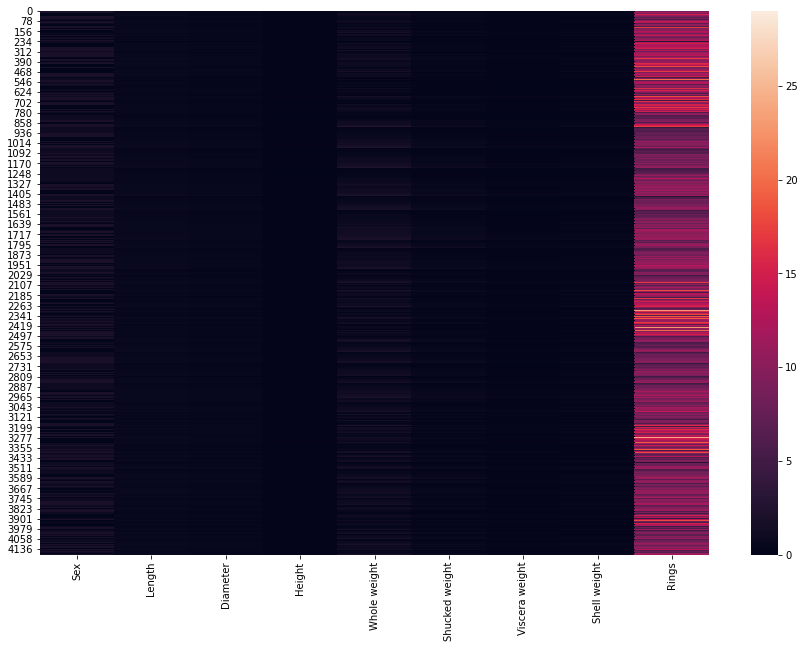

In [32]:
# checking the dependencies using heatmap

plt.figure(figsize=(15,10))
sns.heatmap(df[['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']])

Text(0.5, 1.0, 'Rings VS Length and Sex')

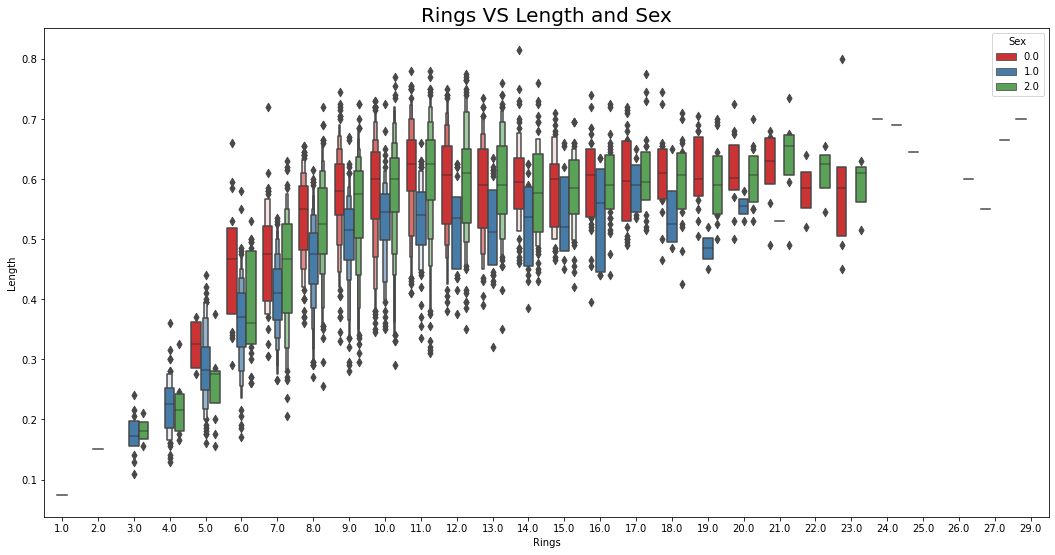

In [18]:
# Rings vs Length and Sex

plt.figure(figsize=(18,9))
sns.boxenplot(df['Rings'], df['Length'], hue=df['Sex'], palette='Set1')
plt.title('Rings VS Length and Sex', fontsize = 20)

Text(0.5, 1.0, 'Rings VS Diameter and Sex')

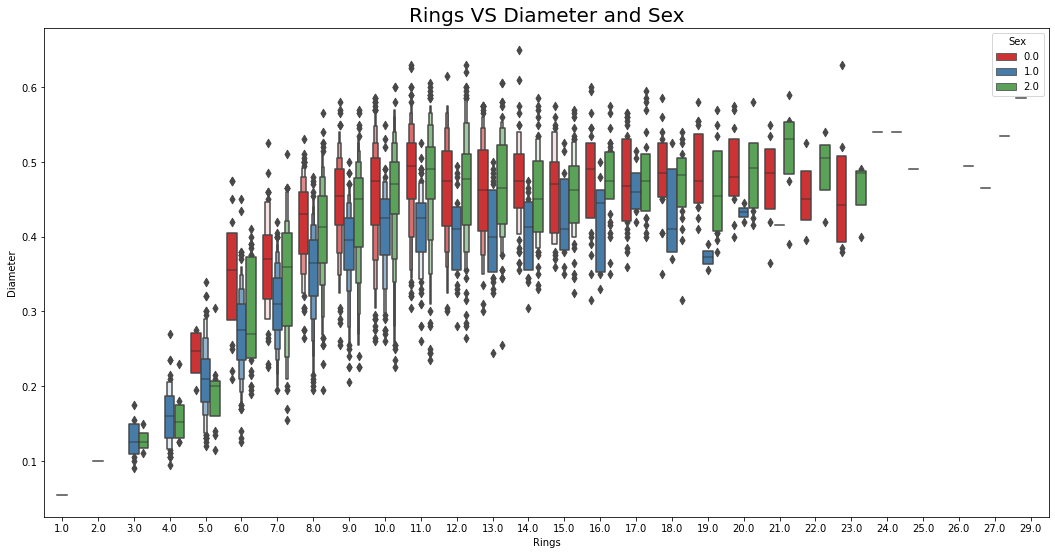

In [19]:
# Rings vs Diameter and Sex

plt.figure(figsize=(18,9))
sns.boxenplot(df['Rings'], df['Diameter'], hue=df['Sex'], palette='Set1')
plt.title('Rings VS Diameter and Sex', fontsize = 20)

Text(0.5, 1.0, 'Rings VS Height and Sex')

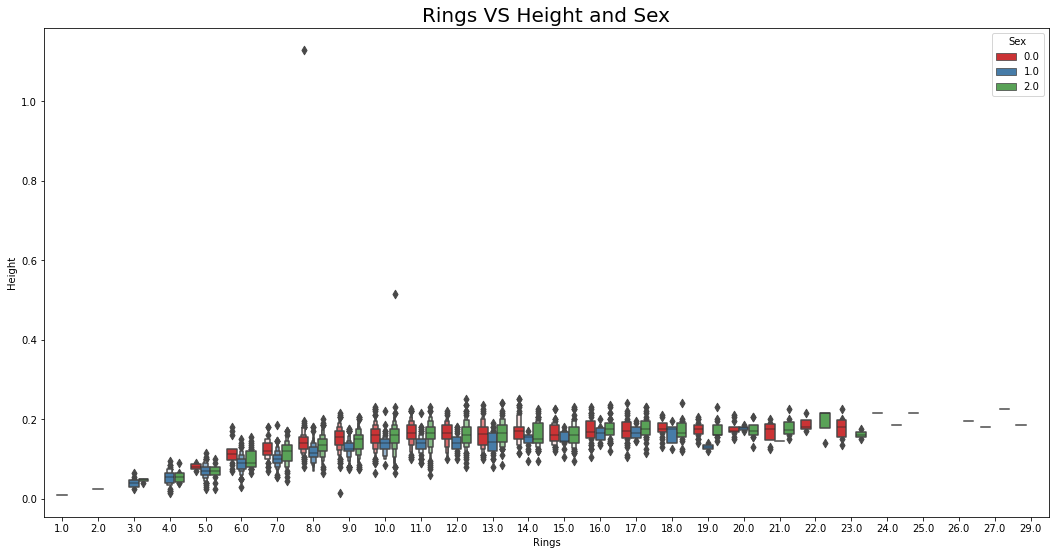

In [20]:
# Rings vs Height and Sex

plt.figure(figsize=(18,9))
sns.boxenplot(df['Rings'], df['Height'], hue=df['Sex'], palette='Set1')
plt.title('Rings VS Height and Sex', fontsize = 20)

Text(0.5, 1.0, 'Rings VS Whole weight')

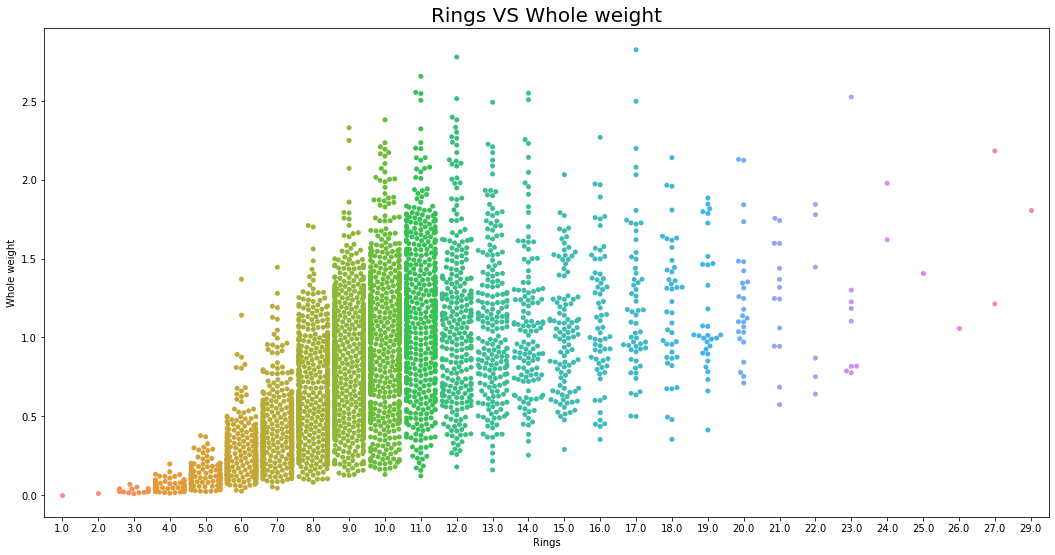

In [21]:
# Rings vs Whole weight

plt.figure(figsize=(18,9))
sns.swarmplot(df['Rings'], df['Whole weight'])
plt.title('Rings VS Whole weight', fontsize=20)

Text(0.5, 1.0, 'Rings VS Shucked weight')

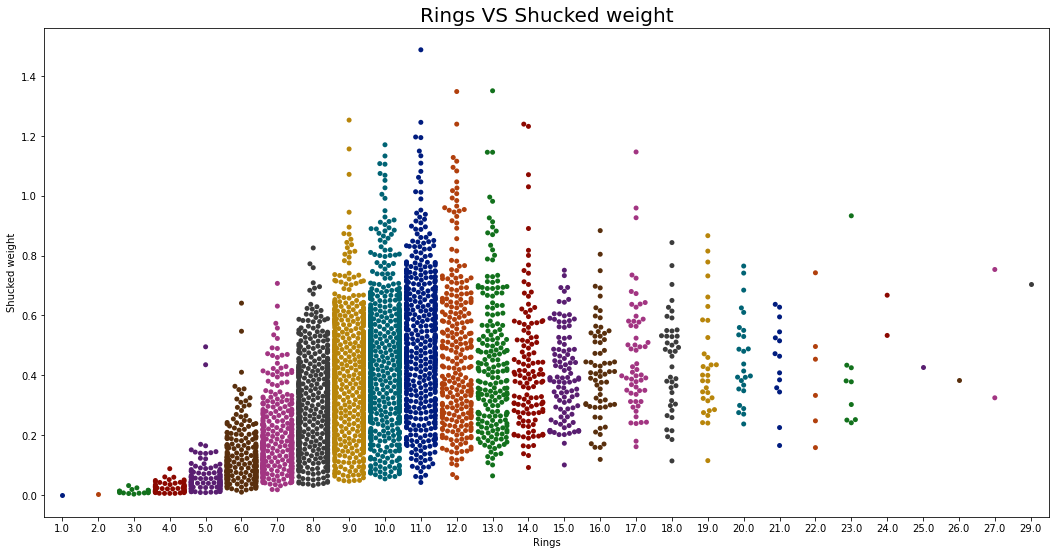

In [22]:
# Rings vs Shucked weight

plt.figure(figsize=(18,9))
sns.swarmplot(df['Rings'], df['Shucked weight'], palette='dark')
plt.title('Rings VS Shucked weight', fontsize=20)

Text(0.5, 1.0, 'Rings VS Viscera weight')

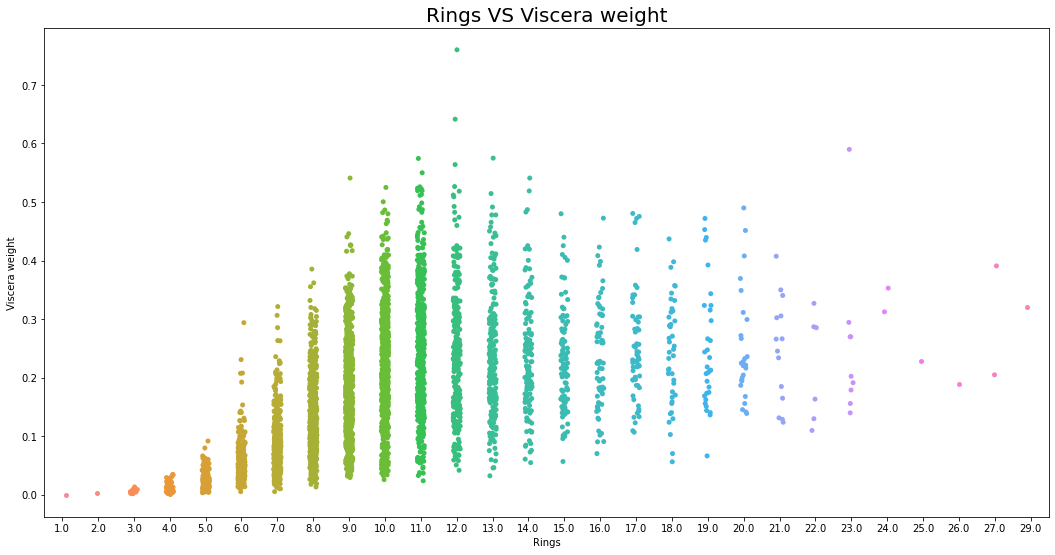

In [23]:
# Rings vs Viscera weight

plt.figure(figsize=(18,9))
sns.stripplot(df['Rings'], df['Viscera weight'])
plt.title('Rings VS Viscera weight', fontsize=20)

Text(0.5, 1.0, 'Rings VS Shell weight')

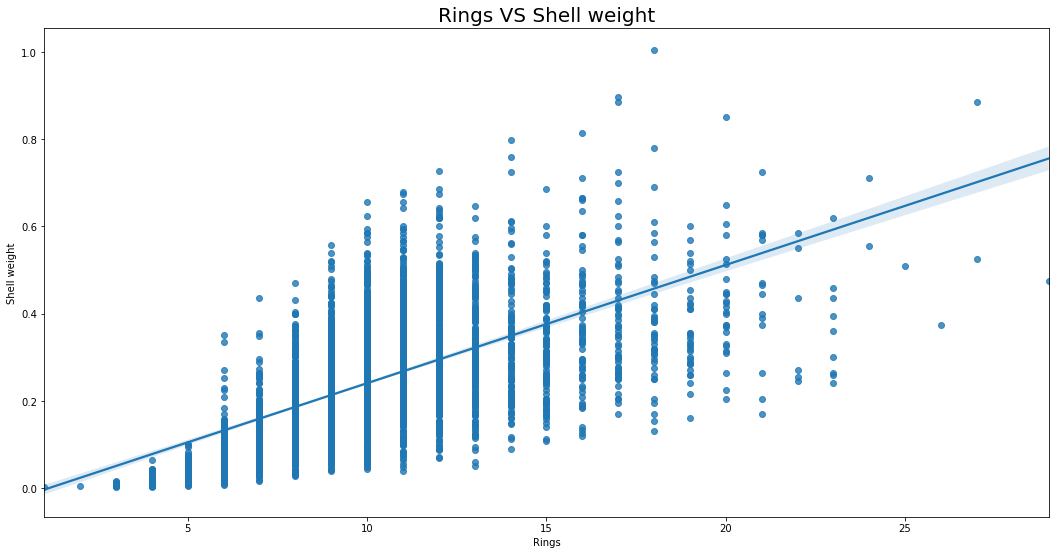

In [24]:
# Ringd vs Shell weight

plt.figure(figsize=(18,9))
sns.regplot(df['Rings'], df['Shell weight'])
plt.title('Rings VS Shell weight', fontsize=20)

In [25]:
# spliting the lable data

y = df['Rings']
x = df.drop(['Rings'], axis=1)

In [26]:
# Spliting the dataset

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state=0)

# Checking the shape after split
print("Shape of x_Train :", x_train.shape)
print("Shape of x_Test :", x_test.shape)
print("Shape of y_Train :", y_train.shape)
print("Shape of x_Test :", y_test.shape)

Shape of x_Train : (3340, 8)
Shape of x_Test : (835, 8)
Shape of y_Train : (3340,)
Shape of x_Test : (835,)


In [27]:
# Modelling 
# Random forest regression

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Evaluation

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# R2 score
r2 = r2_score(y_test, y_pred)
print("R2 Score :", r2)

RMSE : 2.4699390280723956
R2 Score : 0.3851733559365349


In [28]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

# Initializing classifier and giving hyperparameter K=3
knn = KNeighborsClassifier(n_neighbors=3)
# Traning classifier
knn.fit(x_train, y_train)
# Evaluate the classifier
print(knn.score(x_test, y_test))

# Try changing hyperparameter
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
print(knn.score(x_test, y_test))

0.21676646706586827
0.24790419161676647


In [29]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

# Initializing classifier with one-v-rest approach
logr = LogisticRegression(multi_class= 'ovr', random_state=10)
# Traning classifier
logr.fit(x_train, y_train)
# Evaluate the classifier
print(logr.score(x_test, y_test))

0.24790419161676647


In [30]:
# Decision Tree

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

# Initializing classifier
dtc = DecisionTreeClassifier(random_state=8, max_depth=6)
# Traning classifier
dtc.fit(x_train, y_train)
# Evaluate the classifier
print(dtc.score(x_test, y_test))

0.25868263473053893


# Thank you